In [ ]:
---
embed-resources: true
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import pandas as pd
import numpy as np

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

# df_titanic

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# np.unique(df_titanic["class"])

array(['1st', '2nd', '3rd', 'deck crew', 'engineering crew',
       'restaurant staff', 'victualling crew'], dtype=object)

In [4]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})

df_psngrs = df_titanic[df_titanic["type"]=="passenger"]

In [13]:
joint_ec = pd.crosstab(df_psngrs["embarked"],df_psngrs["class"], normalize = True)
print(joint_ec)

class          1st       2nd       3rd
embarked                              
B         0.002278  0.004556  0.000000
C         0.108580  0.019742  0.077449
Q         0.002278  0.005315  0.085801
S         0.132878  0.186029  0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [19]:
# Code here
marg_class = joint_ec.sum(axis = 1)
marg_emb = joint_ec.sum(axis = 0)

cond_class = joint_ec.divide(marg_class, axis = 0)
cond_emb = joint_ec.divide(marg_emb, axis = 1)

print(cond_class)
print(cond_emb)

class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481
class          1st       2nd       3rd
embarked                              
B         0.009259  0.021127  0.000000
C         0.441358  0.091549  0.143865
Q         0.009259  0.024648  0.159379
S         0.540123  0.862676  0.696756


What proportion of 3rd class passengers embarked at Southampton? Answer: 69.67%

What proportion of Southampton passengers were in 3rd class? Answer: 54%

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [23]:
from plotnine import *
# only dataframes work with plotnine

In [24]:
# From Lecturer notes # make cond_class into a data frame with no index

## Option 1
cond_class["embarked"] = cond_class.index
cond_class = cond_class.reset_index(drop = True)

## Shortcut option
cond_class = cond_class.reset_index()
cond_class

class,level_0,index,1st,2nd,3rd,embarked
0,0,0,0.333333,0.666667,0.000000,0
1,1,1,0.527675,0.095941,0.376384,1
2,2,2,0.024390,0.056911,0.918699,2
3,3,3,0.191466,0.268053,0.540481,3


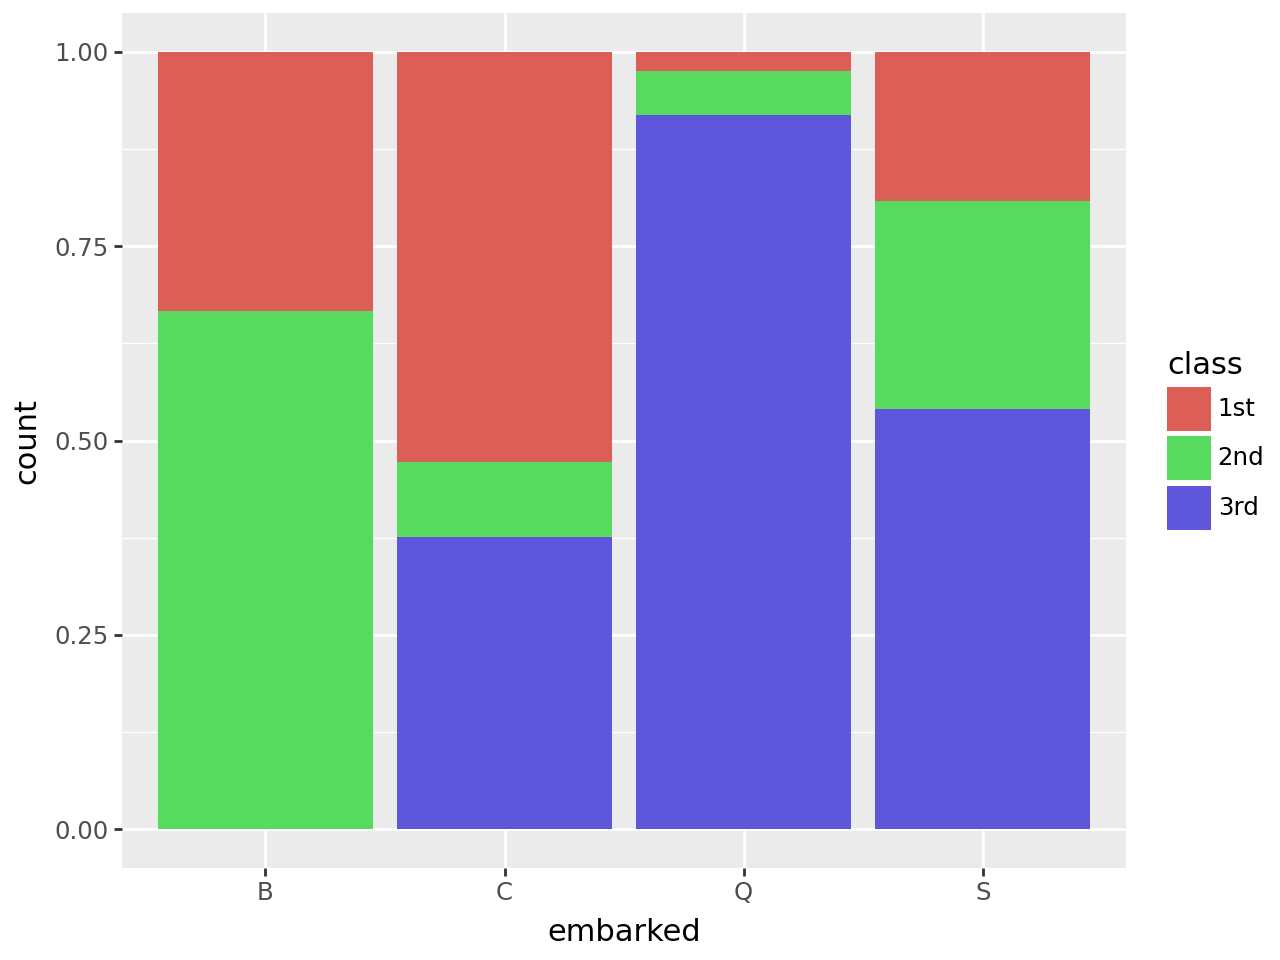

In [25]:
# viz from lecturer
 (ggplot(df_psngrs, aes(x = "embarked", fill = "class"))
    + geom_bar(position = "fill")
)

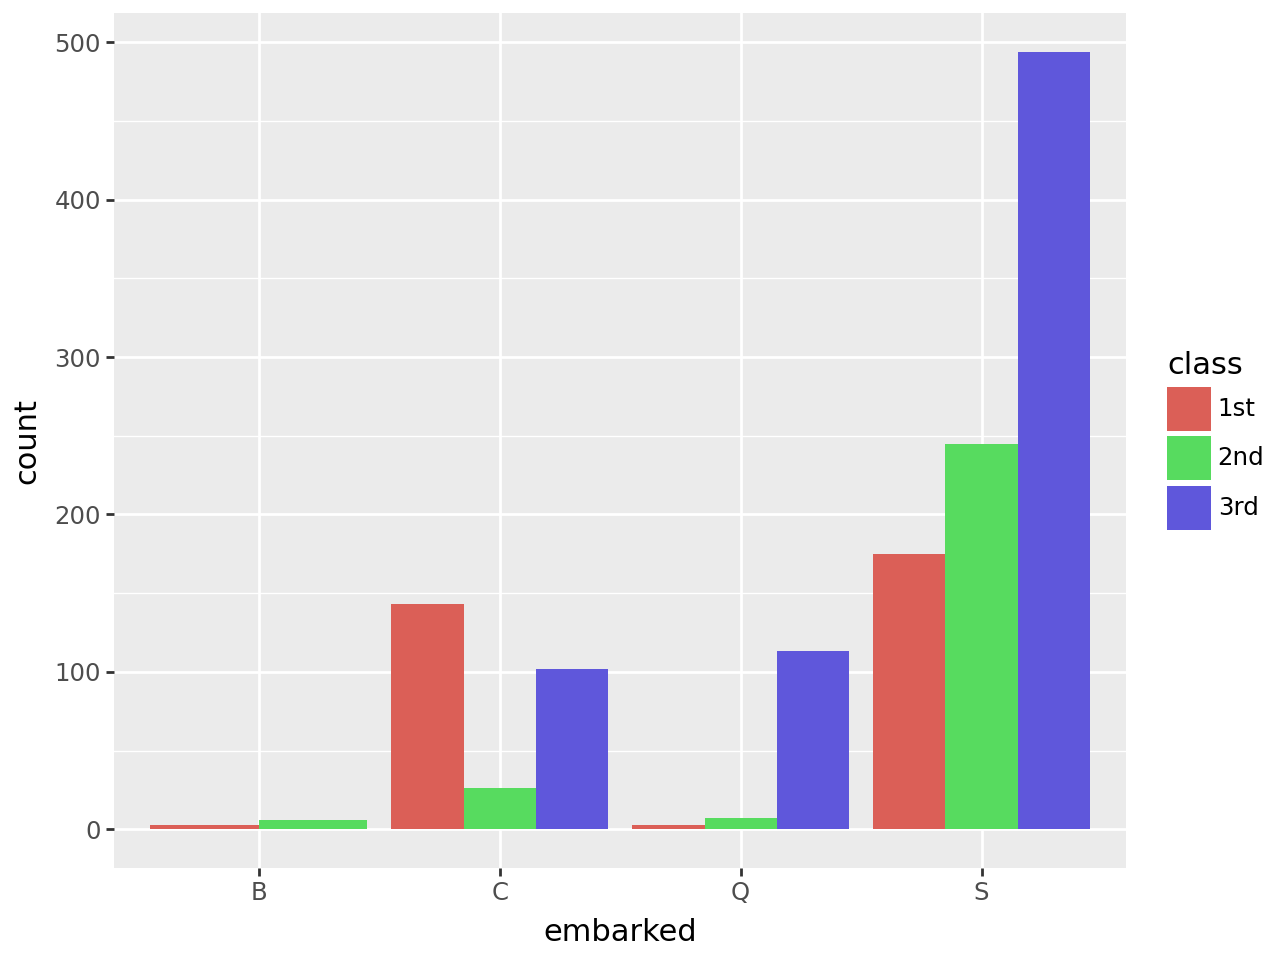

In [26]:
# alt viz
(ggplot(df_psngrs, aes(x = "embarked", fill = "class"))
+ geom_bar(position = "dodge")
)

With visualization it's easy to assess the relative proportions between difference locations and class. With a table, it's easier to assess specific values and understand how distirbution is formed.